PyTorch version: 2.2.1+cu121
CUDA available: True
CUDA version: 12.1
Available GPUs: 1
GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU


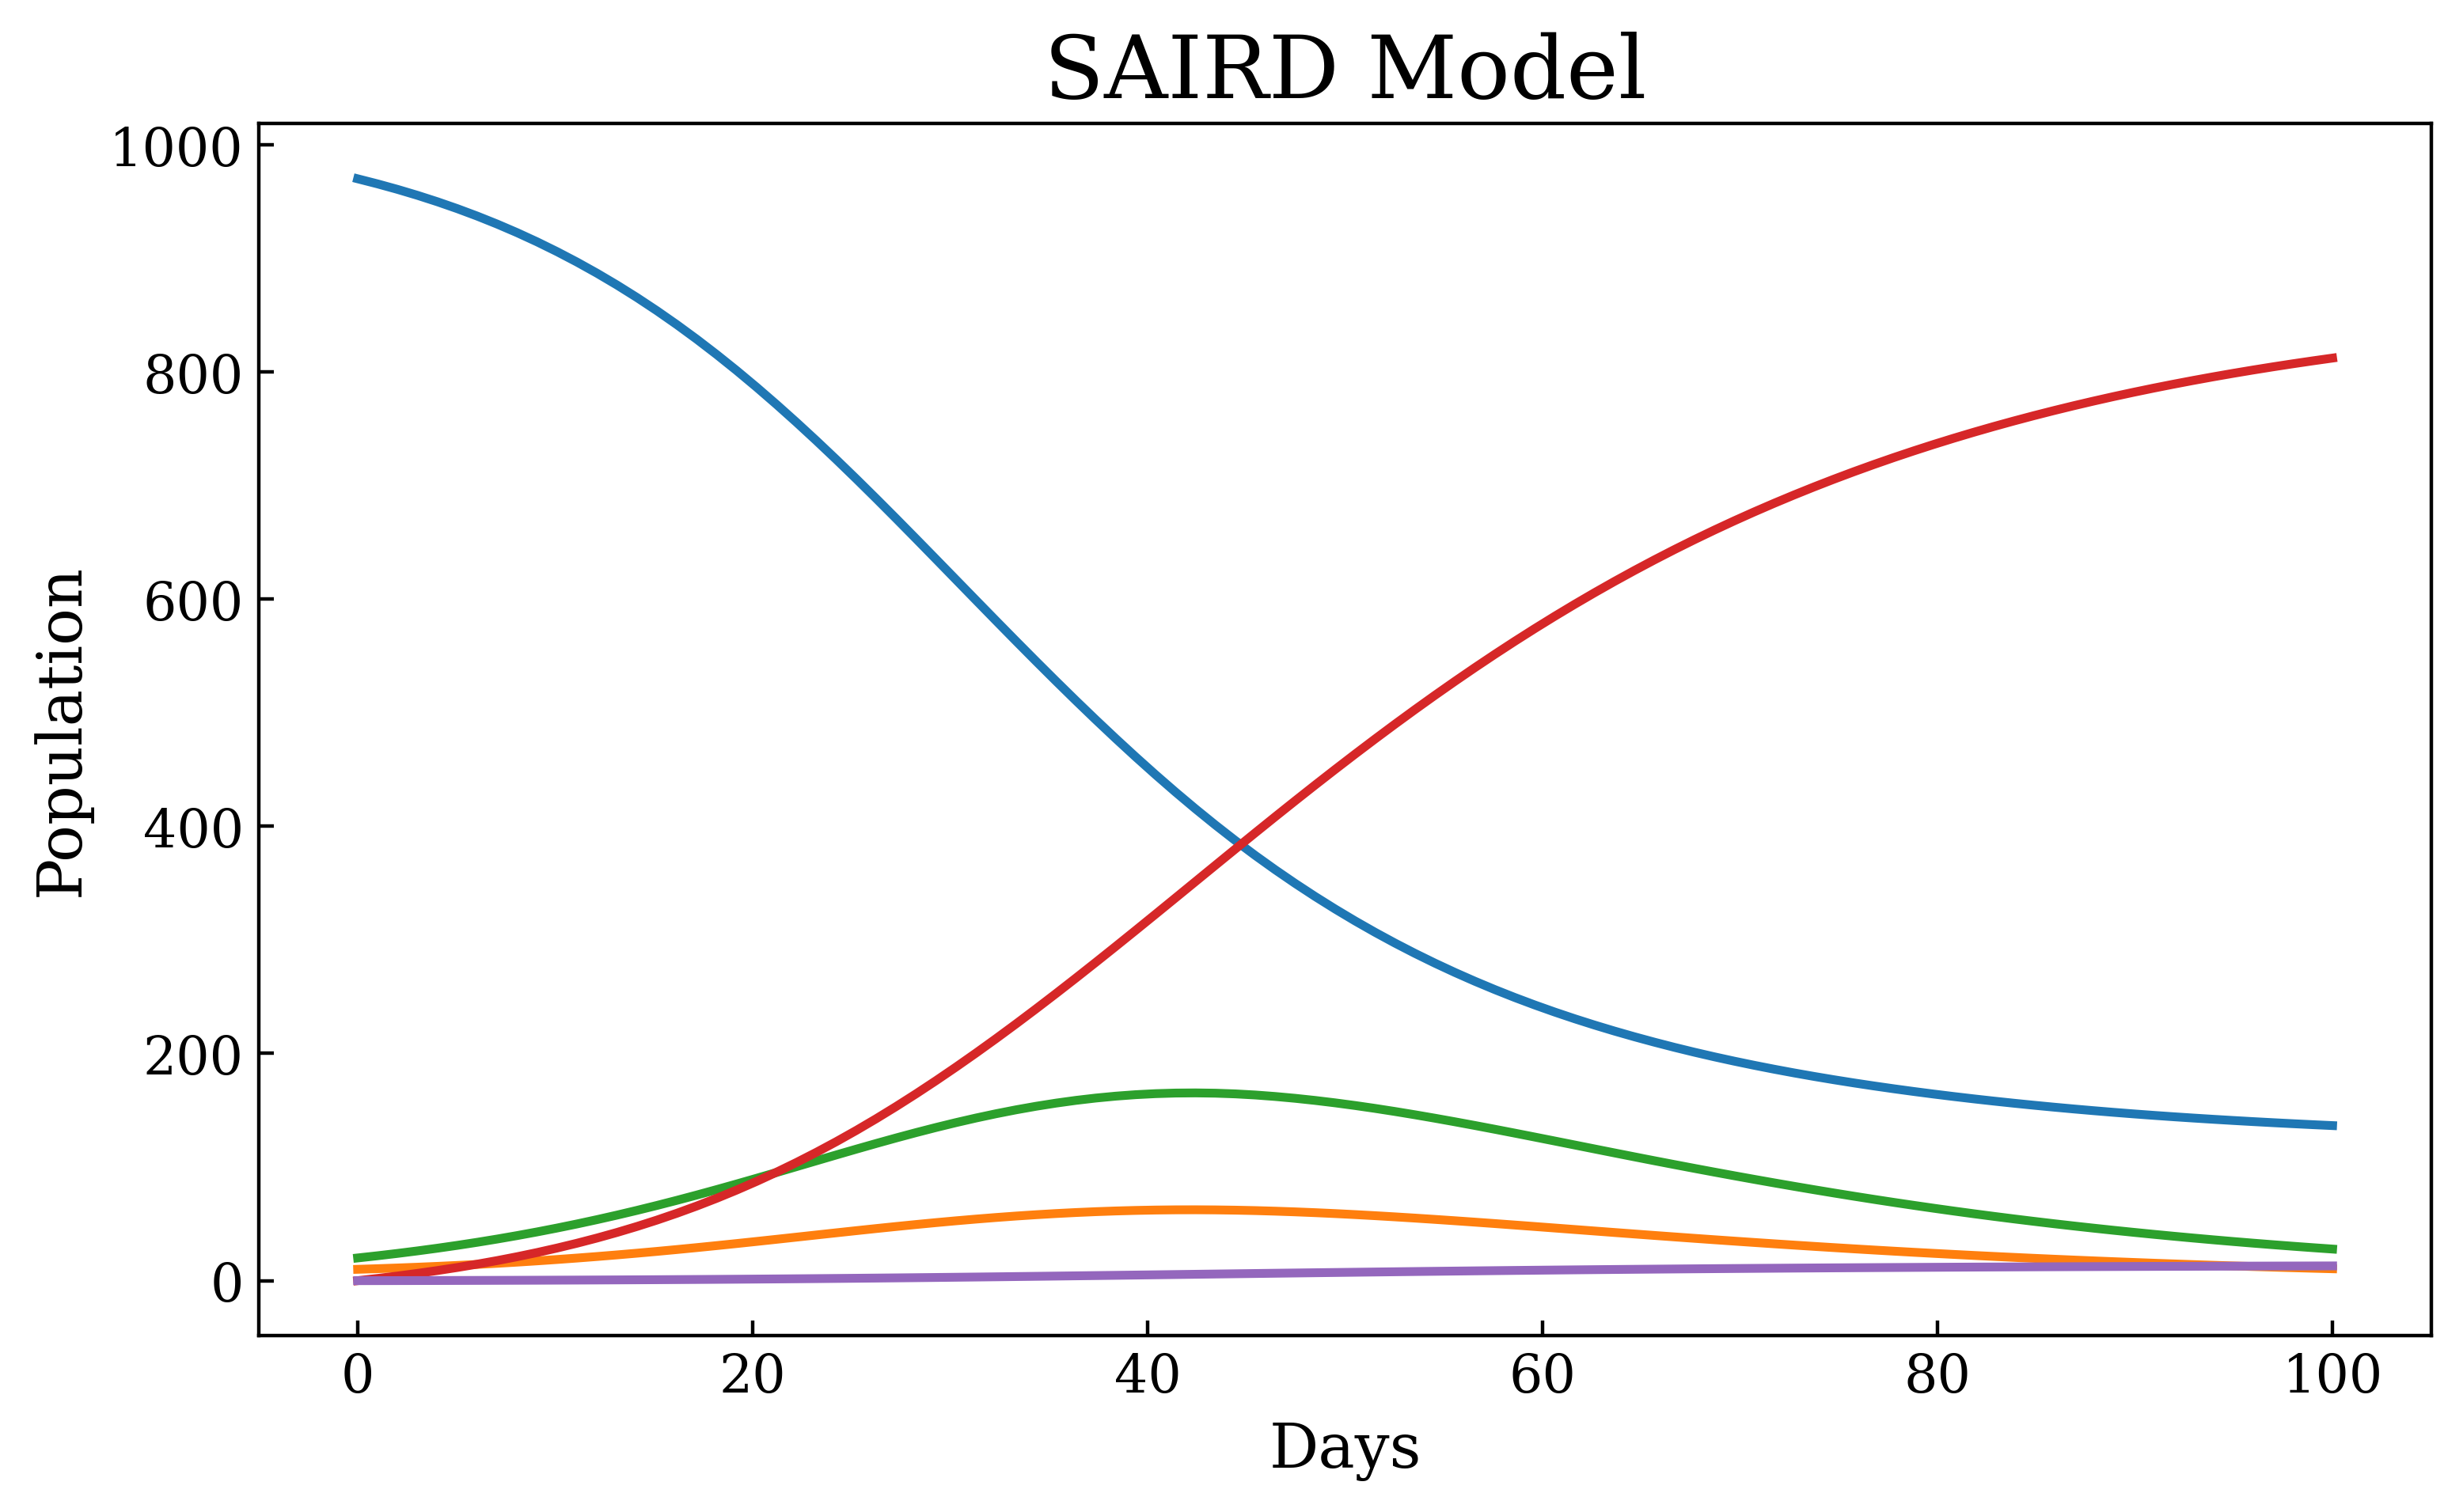

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
# runge-kutta method
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def check_pytorch():
    # Print PyTorch version
    print(f"PyTorch version: {torch.__version__}")

    # Check CUDA availability
    cuda_available = torch.cuda.is_available()
    print(f"CUDA available: {cuda_available}")

    if cuda_available:
        # Print CUDA version
        print(f"CUDA version: {torch.version.cuda}")
        
        # List available GPUs
        gpu_count = torch.cuda.device_count()
        print(f"Available GPUs: {gpu_count}")
        for i in range(gpu_count):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA not available. PyTorch will run on CPU.")
        
check_pytorch()

# Set up matplotlib
plt.rcParams.update({
    # Font settings for clarity and compatibility with academic publications
    "font.family": "serif",  # Consistent font family
    # "font.serif": ["Times", "Computer Modern Roman"],  # Preferred serif fonts
    "font.size": 14,  # Base font size for better readability
    "text.usetex": False,  # Enable LaTeX for text rendering for a professional look

    # Figure aesthetics & size for detailed visuals and fit on publication pages
    "figure.figsize": (8, 5),  # Adjusted figure size for a balance between detail and fit
    "figure.facecolor": "white",  # White figure background for clean print
    "figure.autolayout": True,  # Enable automatic layout adjustments
    "figure.dpi": 400,  # High resolution figures
    "savefig.dpi": 400,  # High resolution saving settings
    "savefig.format": "pdf",  # Save figures in PDF format for publications
    "savefig.bbox": "tight",  # Tight bounding box around figures

    # Axes aesthetics for clarity and precision
    "axes.labelsize": 14,  # Clear labeling with larger font size
    "axes.titlesize": 20,  # Prominent titles for immediate recognition
    "axes.facecolor": "white",  # White axes background

    # Legend aesthetics for distinguishing plot elements
    "legend.fontsize": 12,  # Readable legend font size
    "legend.frameon": False,  # No frame around legend for cleaner look
    "legend.loc": "best",  # Optimal legend positioning

    # Line aesthetics for clear visual distinctions
    "lines.linewidth": 2,  # Thicker lines for visibility
    "lines.markersize": 8,  # Slightly smaller markers for balance

    # Tick label sizes for readability
    "xtick.labelsize": 12, 
    "ytick.labelsize": 12,
    "xtick.direction": "in",  # Ticks inside the plot
    "ytick.direction": "in",  # Ticks inside the plot
})

# Set random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Device setup for CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# SAIRD Model Parameters and Initial Conditions as per the paper
params = {
    "rho1": 0.80,
    "rho2": 0.29,
    "alpha": 0.1,
    "beta": 0.17,
    "gamma": 1 / 16,
    "theta": 0.001,
    "N": 1000,
}
initial_conditions = [970, 10, 20, 0, 0]  # [S0, A0, I0, R0, D0]


# Define the SAIRD model differential equations
def saird_model(t, y, params):
    S, A, I, R, D = y
    N = params["N"]
    dSdt = -params["beta"] * I * S / N - params["alpha"] * A * S / N
    dAdt = (
        params["rho2"] * params["beta"] * I * S / N
        + (1 - params["rho1"]) * params["alpha"] * A * S / N
        - params["gamma"] * A
        - params["theta"] * A
    )
    dIdt = (
        (1 - params["rho2"]) * params["beta"] * I * S / N
        + params["rho1"] * params["alpha"] * A * S / N
        - params["gamma"] * I
        - params["theta"] * I
    )
    dRdt = params["gamma"] * (I + A)
    dDdt = params["theta"] * (I + A)
    return [dSdt, dAdt, dIdt, dRdt, dDdt]


# Generate synthetic SAIRD data
t_span = [0, 100]  # 100 days
t_eval = np.linspace(t_span[0], t_span[1], 100)  # 100 data points
saird_solution = solve_ivp(
    saird_model,
    t_span,
    initial_conditions,
    args=(params,),
    t_eval=t_eval,
    method="RK45",
)

# Extract SIR data from SAIRD solution
S_saird, A_saird, I_saird, R_saird, D_saird = saird_solution.y
S_sir = S_saird + A_saird  # S compartment for SIR
R_sir = R_saird + D_saird  # R compartment for SIR
I_sir = I_saird

# plot the SAIRD model
plt.plot(t_eval, S_saird, label="S")
plt.plot(t_eval, A_saird, label="A")
plt.plot(t_eval, I_saird, label="I")
plt.plot(t_eval, R_saird, label="R")
plt.plot(t_eval, D_saird, label="D")
plt.title("SAIRD Model")
plt.xlabel("Days")
plt.ylabel("Population")
plt.tight_layout()
plt.show()

PyTorch version: 2.2.1+cu121
CUDA available: True
CUDA version: 12.1
Available GPUs: 1
GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU
Epoch 0, Loss: 2.0063
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
EarlyStopping counter: 8 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStop

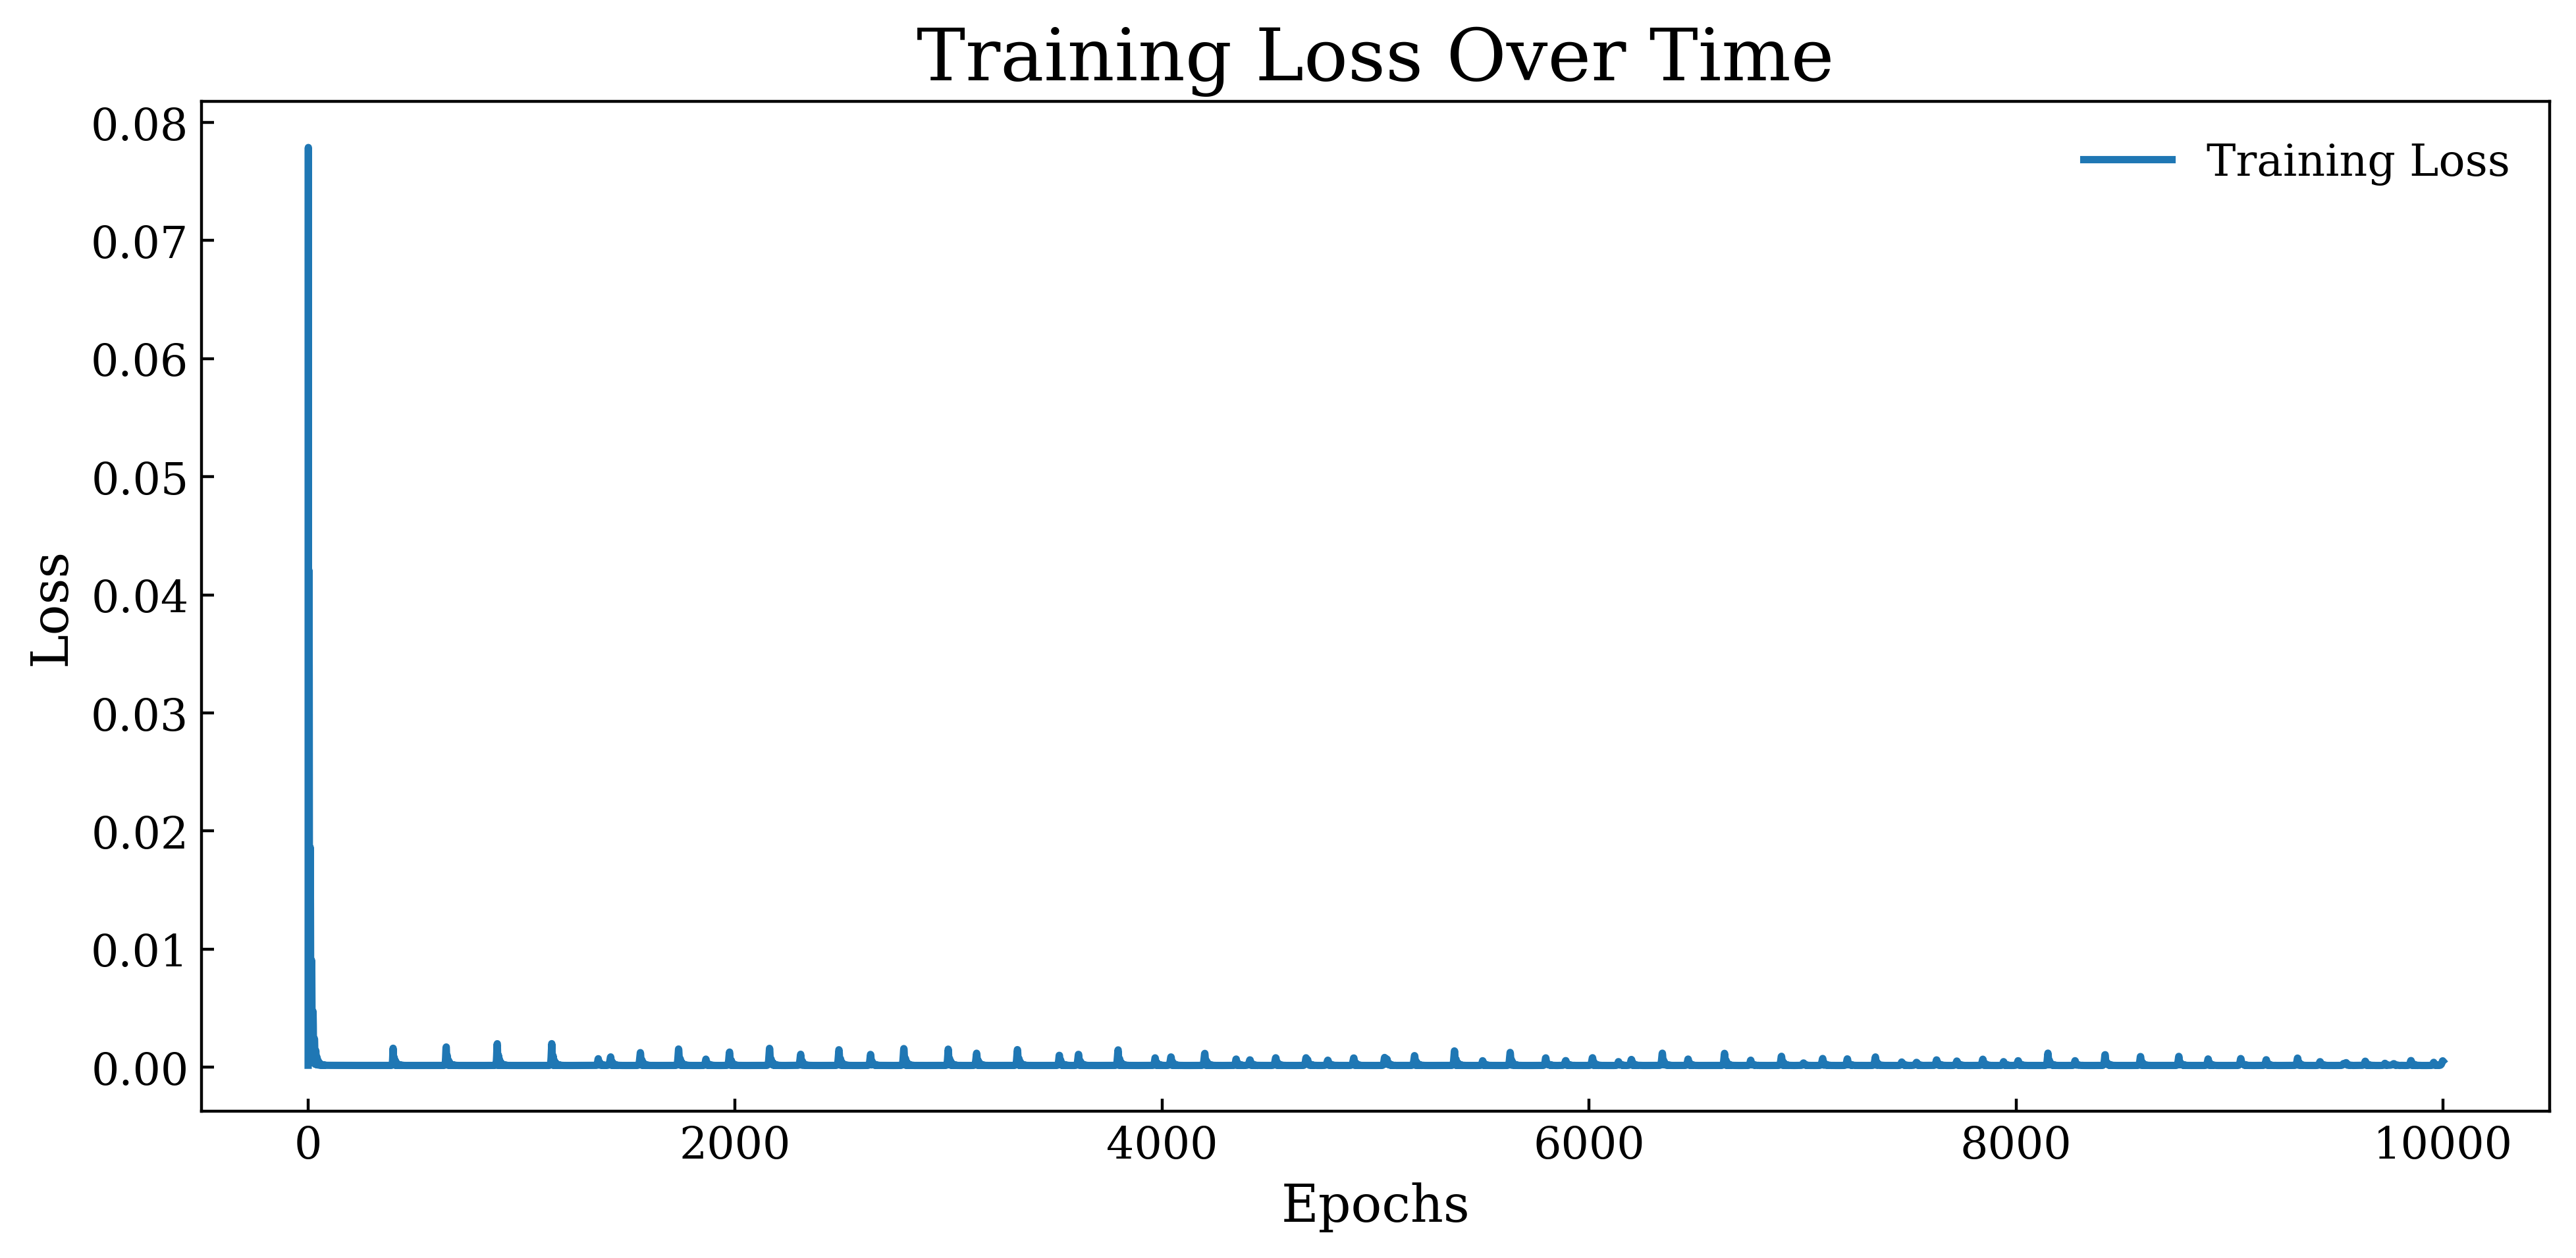

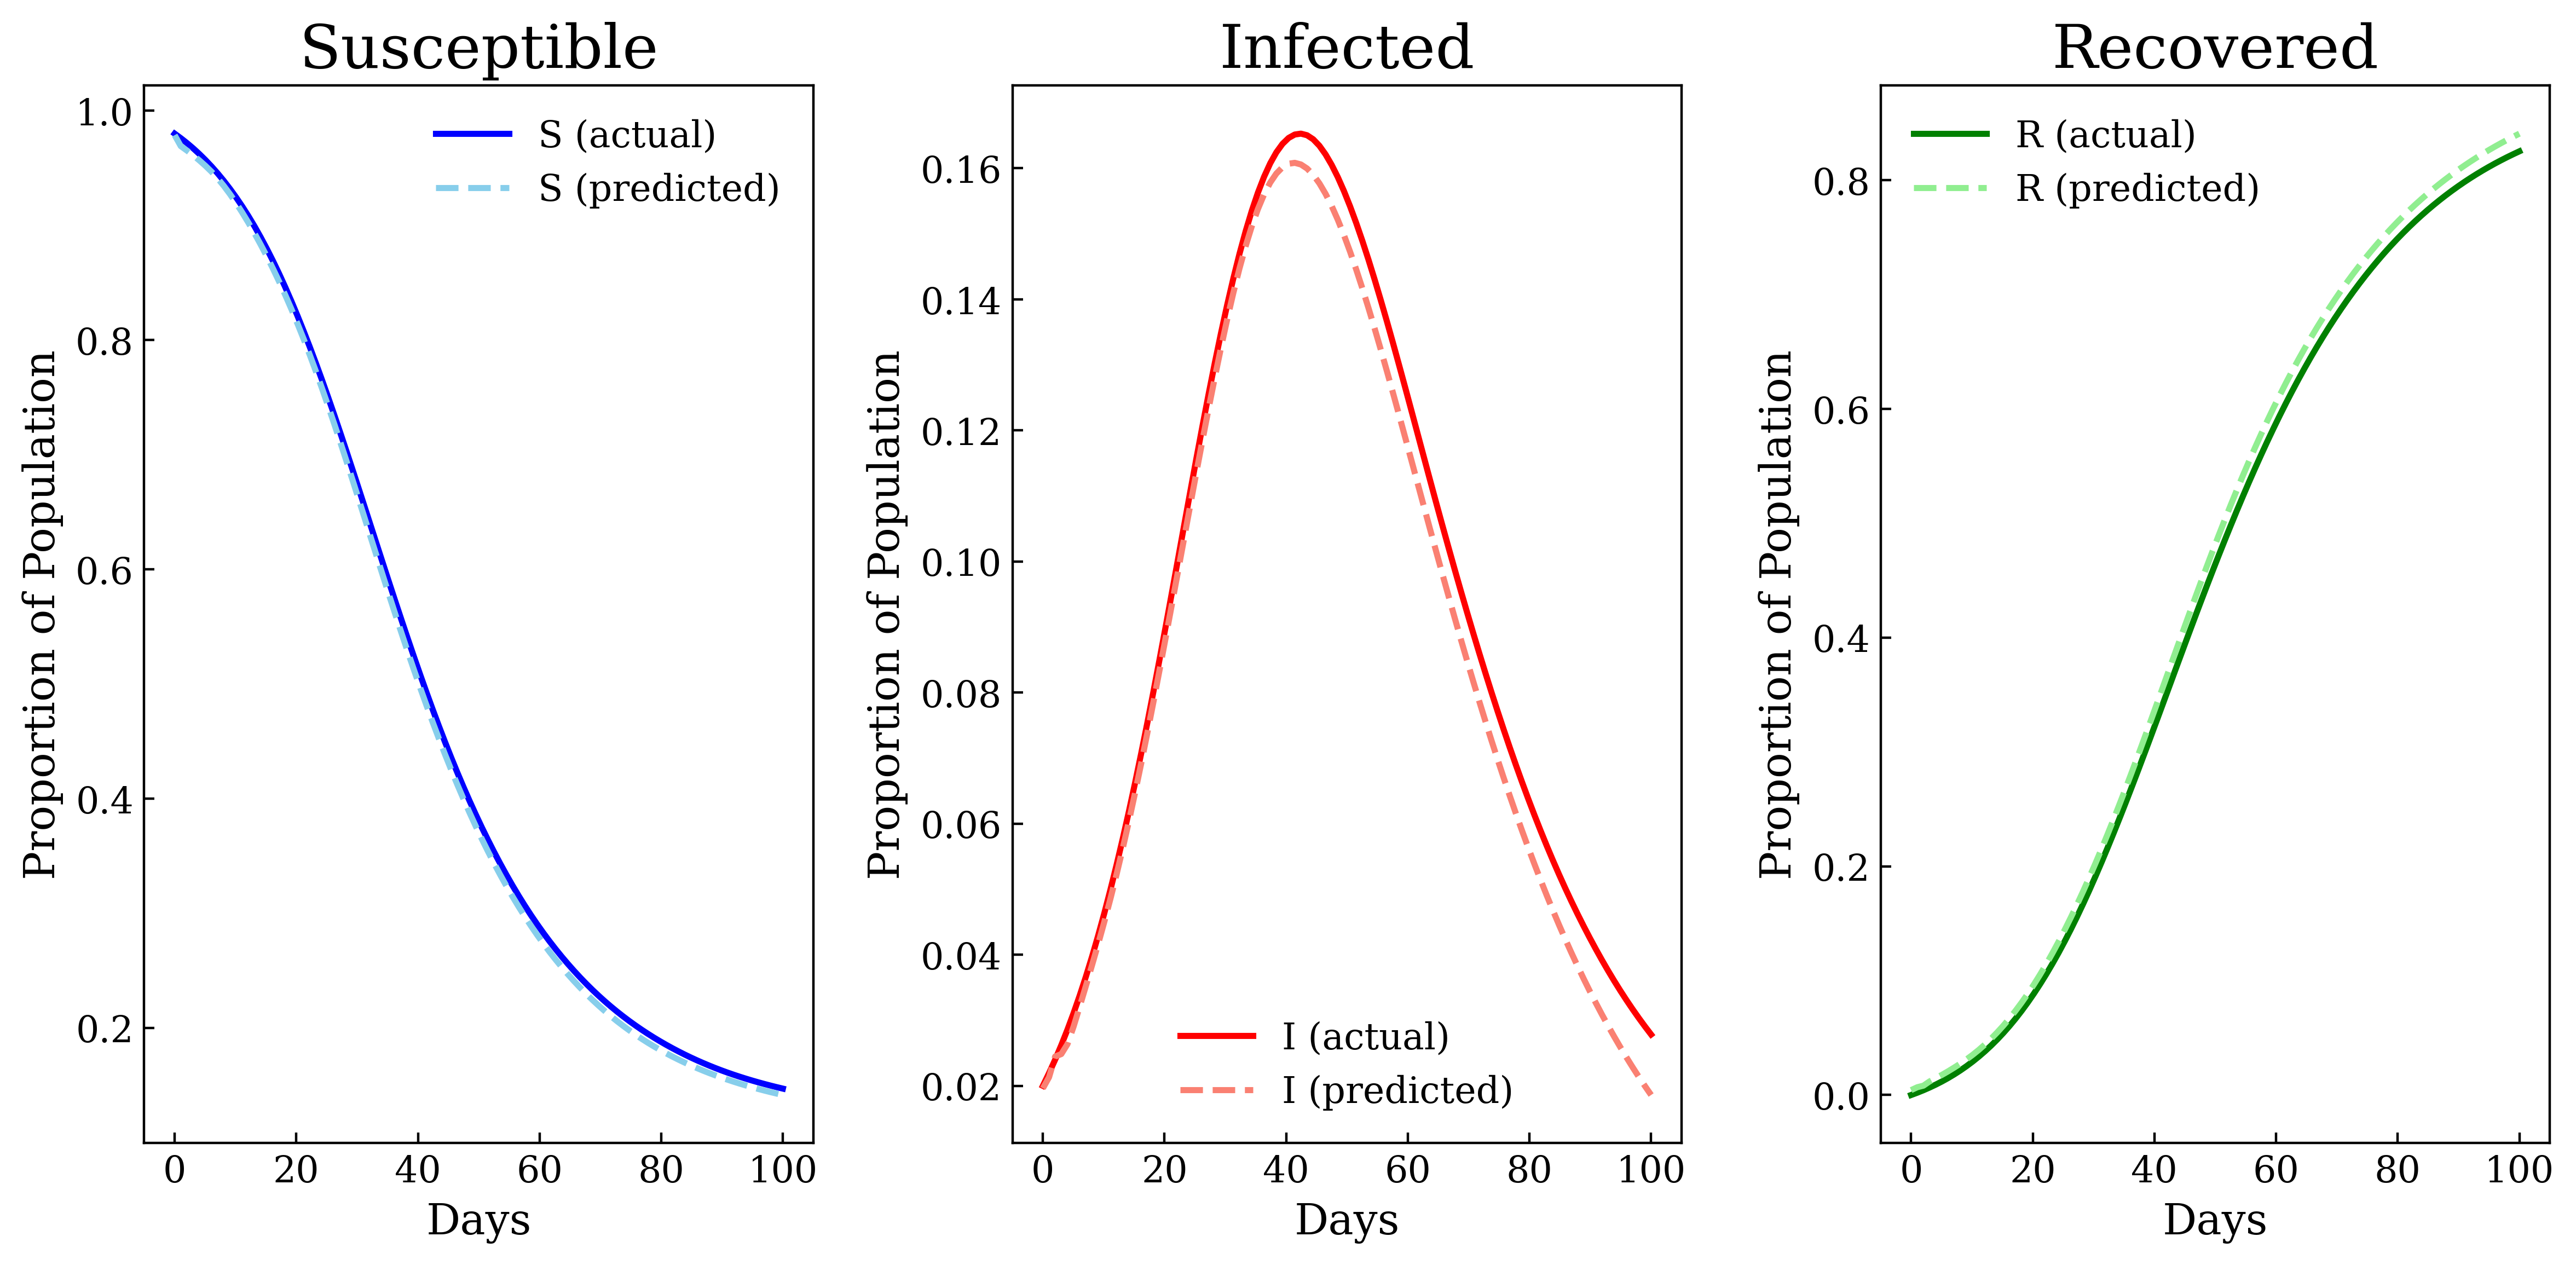

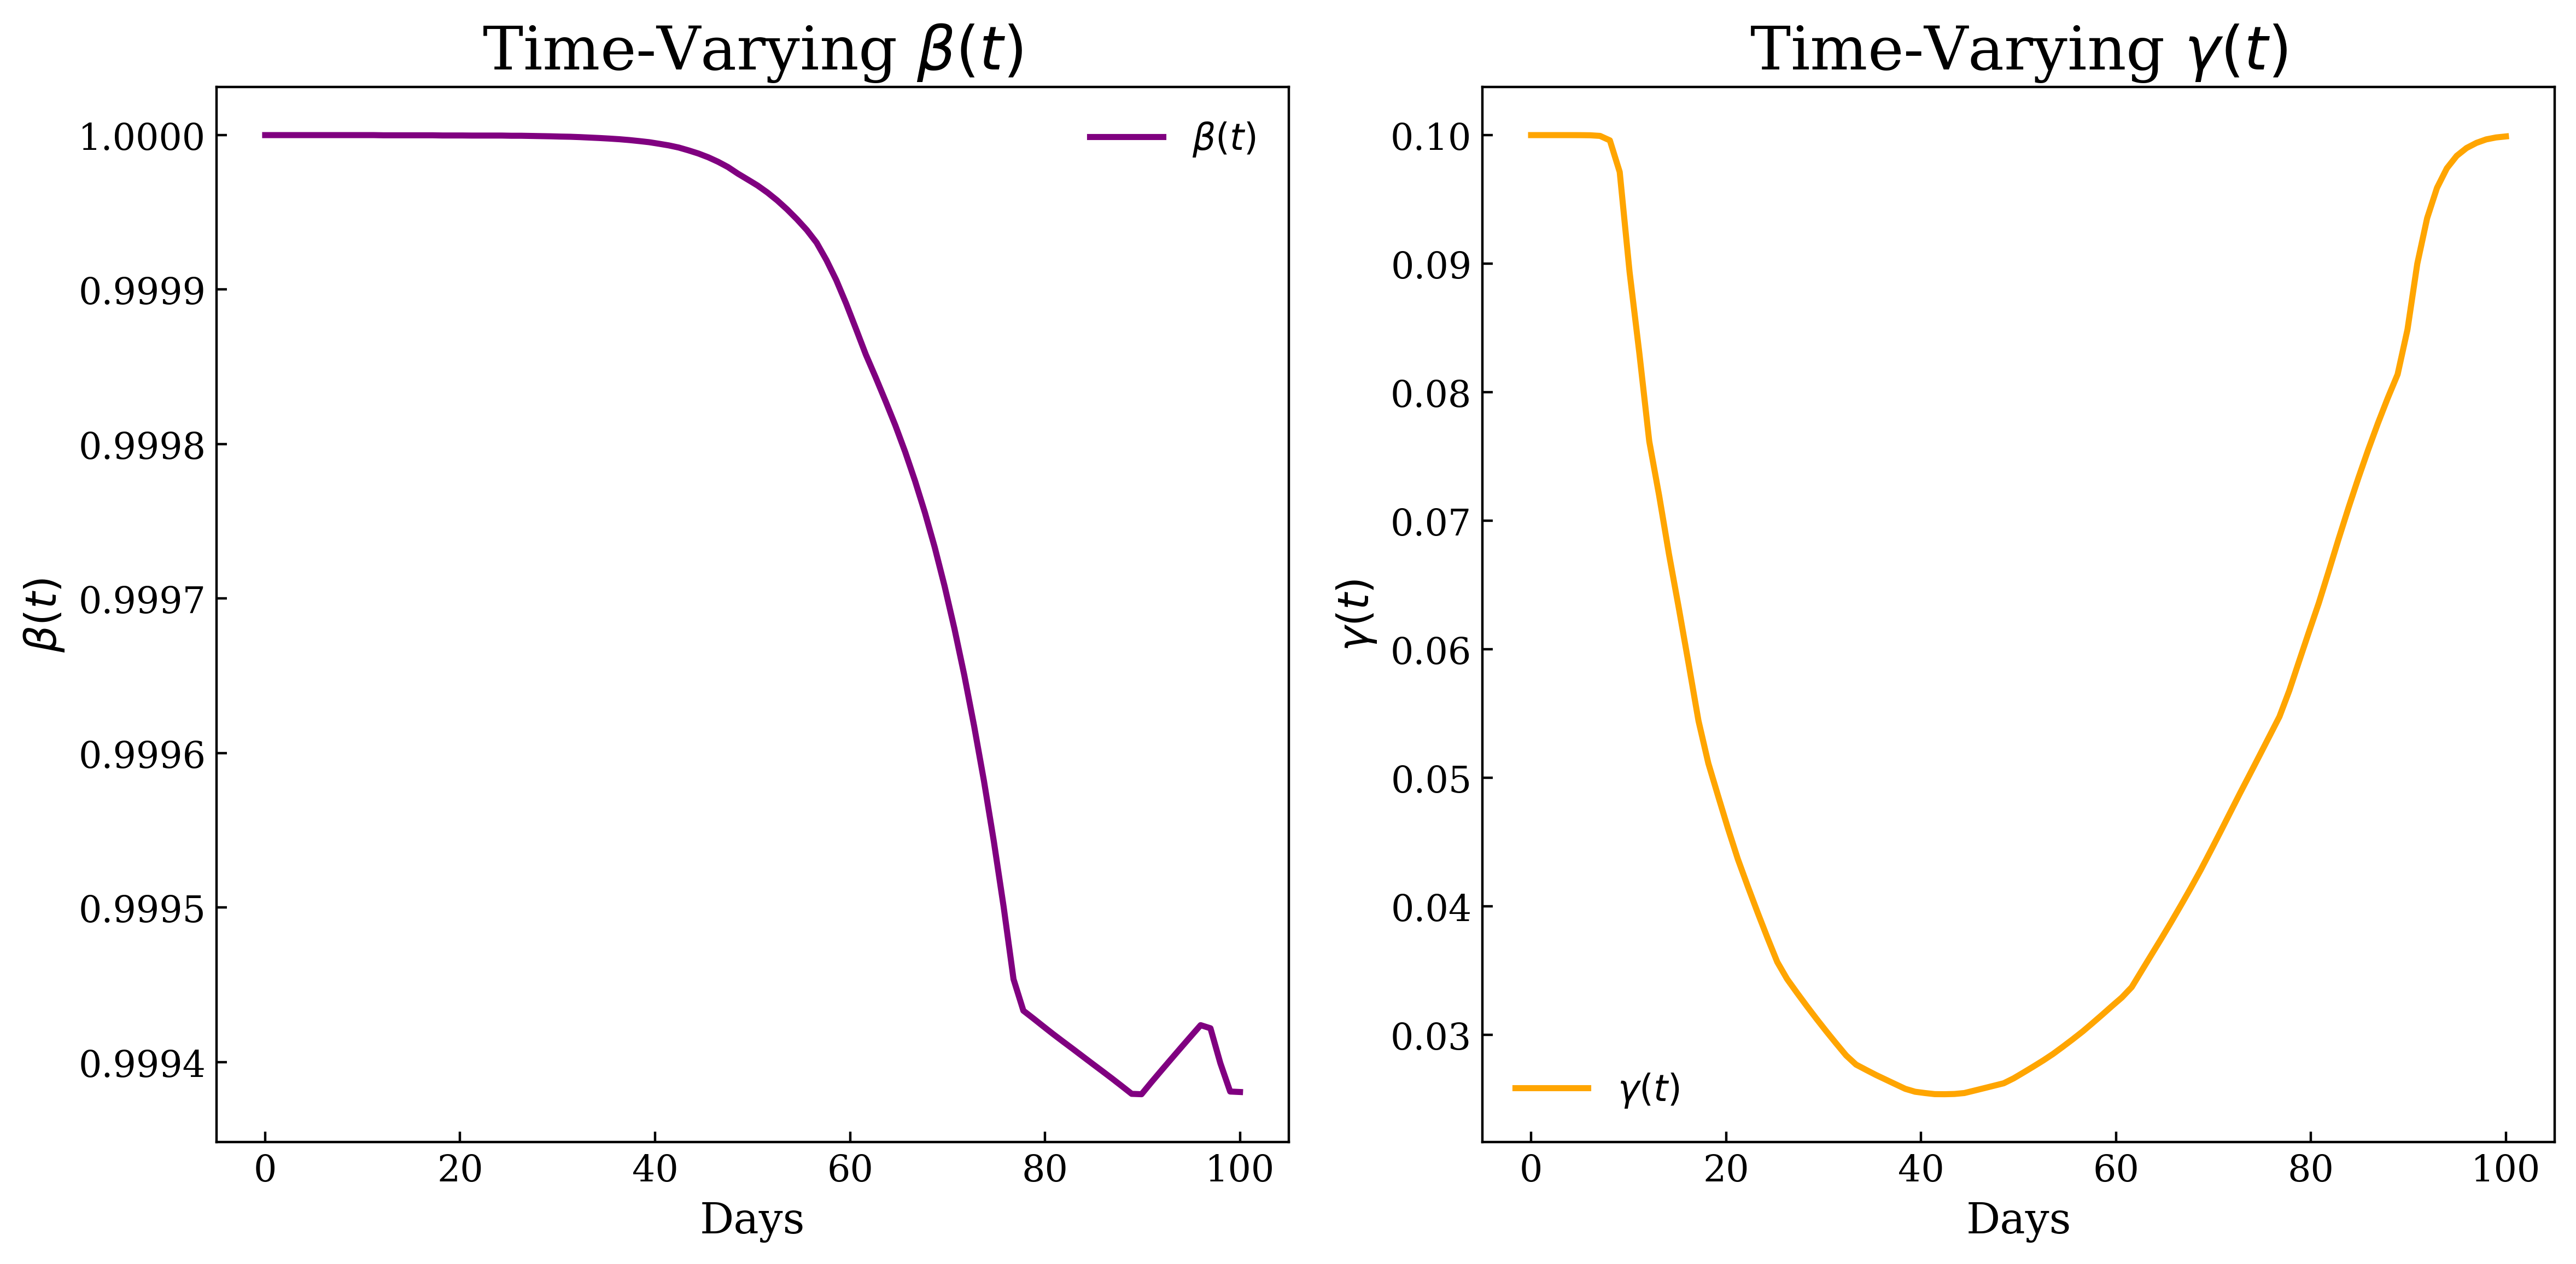

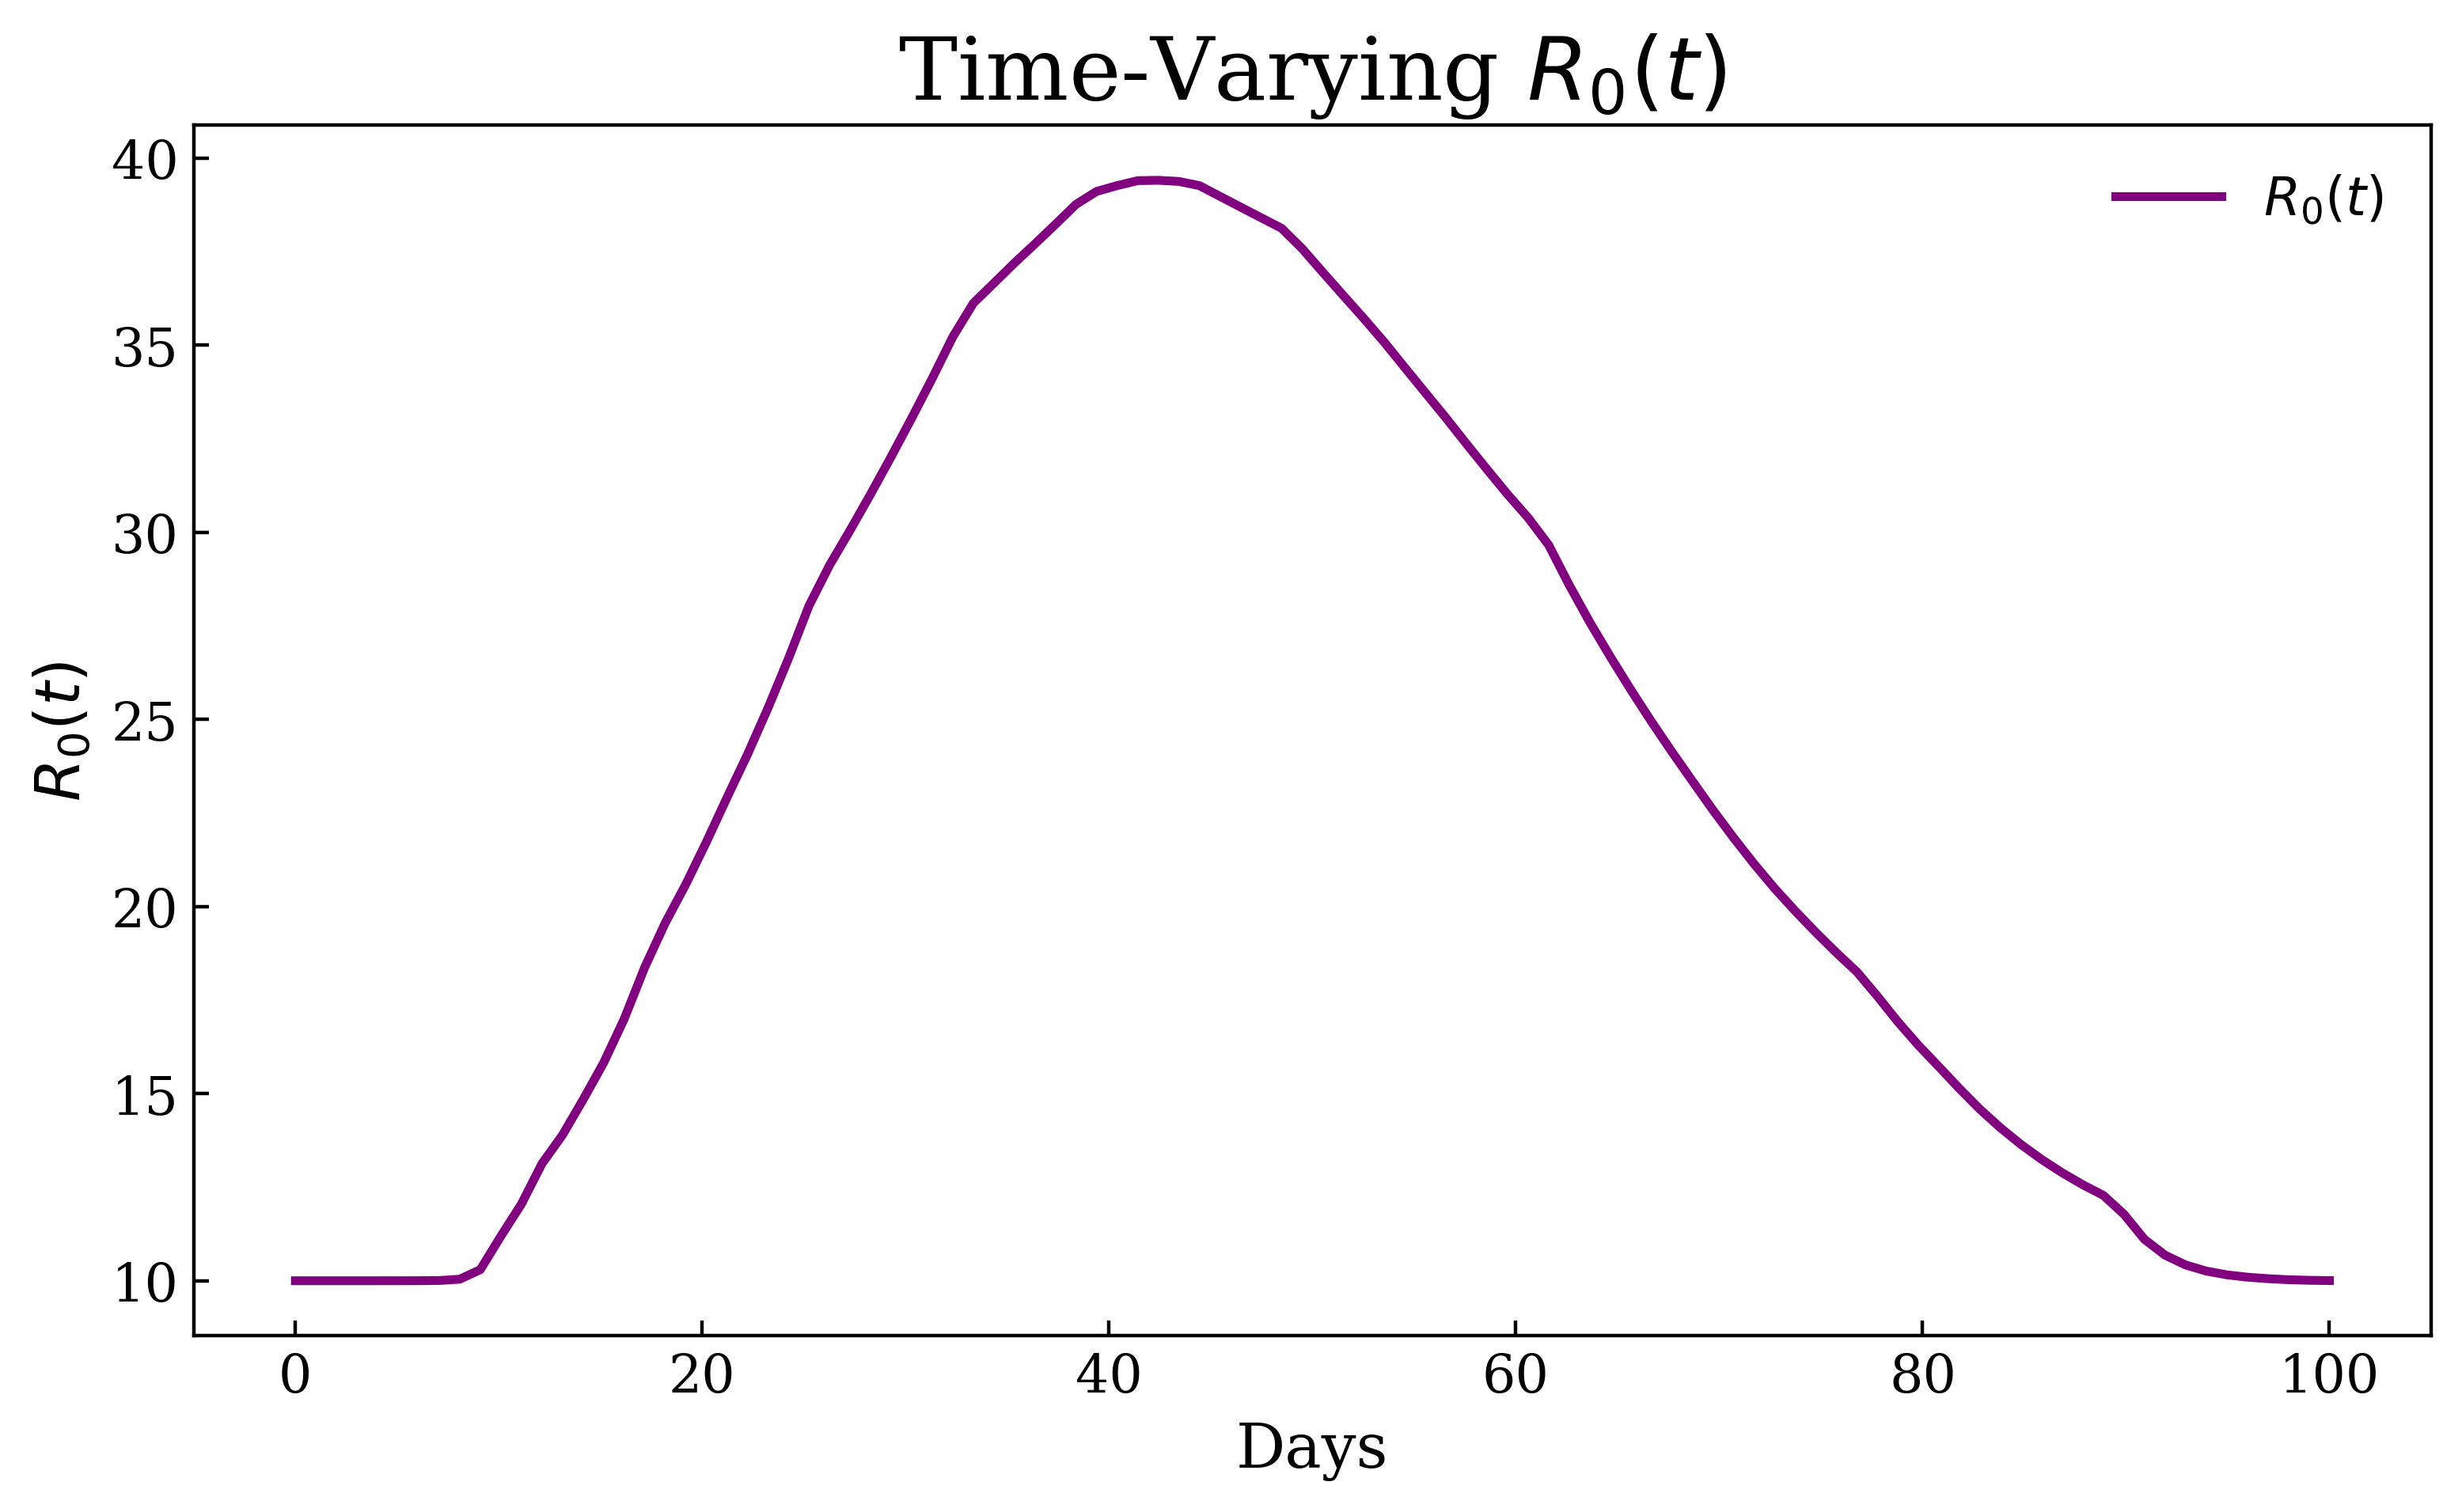

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
# runge-kutta method
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def check_pytorch():
    # Print PyTorch version
    print(f"PyTorch version: {torch.__version__}")

    # Check CUDA availability
    cuda_available = torch.cuda.is_available()
    print(f"CUDA available: {cuda_available}")

    if cuda_available:
        # Print CUDA version
        print(f"CUDA version: {torch.version.cuda}")
        
        # List available GPUs
        gpu_count = torch.cuda.device_count()
        print(f"Available GPUs: {gpu_count}")
        for i in range(gpu_count):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA not available. PyTorch will run on CPU.")
        
check_pytorch()

# Set up matplotlib
plt.rcParams.update({
    # Font settings for clarity and compatibility with academic publications
    "font.family": "serif",  # Consistent font family
    # "font.serif": ["Times", "Computer Modern Roman"],  # Preferred serif fonts
    "font.size": 14,  # Base font size for better readability
    "text.usetex": False,  # Enable LaTeX for text rendering for a professional look

    # Figure aesthetics & size for detailed visuals and fit on publication pages
    "figure.figsize": (8, 5),  # Adjusted figure size for a balance between detail and fit
    "figure.facecolor": "white",  # White figure background for clean print
    "figure.autolayout": True,  # Enable automatic layout adjustments
    "figure.dpi": 400,  # High resolution figures
    "savefig.dpi": 400,  # High resolution saving settings
    "savefig.format": "pdf",  # Save figures in PDF format for publications
    "savefig.bbox": "tight",  # Tight bounding box around figures

    # Axes aesthetics for clarity and precision
    "axes.labelsize": 14,  # Clear labeling with larger font size
    "axes.titlesize": 20,  # Prominent titles for immediate recognition
    "axes.facecolor": "white",  # White axes background

    # Legend aesthetics for distinguishing plot elements
    "legend.fontsize": 12,  # Readable legend font size
    "legend.frameon": False,  # No frame around legend for cleaner look
    "legend.loc": "best",  # Optimal legend positioning

    # Line aesthetics for clear visual distinctions
    "lines.linewidth": 2,  # Thicker lines for visibility
    "lines.markersize": 8,  # Slightly smaller markers for balance

    # Tick label sizes for readability
    "xtick.labelsize": 12, 
    "ytick.labelsize": 12,
    "xtick.direction": "in",  # Ticks inside the plot
    "ytick.direction": "in",  # Ticks inside the plot
})

# Set random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Device setup for CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# SAIRD Model Parameters and Initial Conditions as per the paper
params = {
    "rho1": 0.80,
    "rho2": 0.29,
    "alpha": 0.1,
    "beta": 0.17,
    "gamma": 1 / 16,
    "theta": 0.001,
    "N": 1000,
}
initial_conditions = [970, 10, 20, 0, 0]  # [S0, A0, I0, R0, D0]


# Define the SAIRD model differential equations
def saird_model(t, y, params):
    S, A, I, R, D = y
    N = params["N"]
    dSdt = -params["beta"] * I * S / N - params["alpha"] * A * S / N
    dAdt = (
        params["rho2"] * params["beta"] * I * S / N
        + (1 - params["rho1"]) * params["alpha"] * A * S / N
        - params["gamma"] * A
        - params["theta"] * A
    )
    dIdt = (
        (1 - params["rho2"]) * params["beta"] * I * S / N
        + params["rho1"] * params["alpha"] * A * S / N
        - params["gamma"] * I
        - params["theta"] * I
    )
    dRdt = params["gamma"] * (I + A)
    dDdt = params["theta"] * (I + A)
    return [dSdt, dAdt, dIdt, dRdt, dDdt]


# Generate synthetic SAIRD data
t_span = [0, 100]  # 100 days
t_eval = np.linspace(t_span[0], t_span[1], 100)  # 100 data points
saird_solution = solve_ivp(
    saird_model,
    t_span,
    initial_conditions,
    args=(params,),
    t_eval=t_eval,
    method="RK45",
)

# Extract SIR data from SAIRD solution
S_saird, A_saird, I_saird, R_saird, D_saird = saird_solution.y
S_sir = S_saird + A_saird  # S compartment for SIR
R_sir = R_saird + D_saird  # R compartment for SIR
I_sir = I_saird

# # plot the SAIRD model
# plt.plot(t_eval, S_saird, label="S")
# plt.plot(t_eval, A_saird, label="A")
# plt.plot(t_eval, I_saird, label="I")
# plt.plot(t_eval, R_saird, label="R")
# plt.plot(t_eval, D_saird, label="D")
# plt.title("SAIRD Model")
# plt.xlabel("Days")
# plt.ylabel("Population")
# plt.tight_layout()
# plt.savefig("../../reports/figures/SAIRD_model.pdf")
# plt.show()

# normalize the data
S_sir /= params["N"]
I_sir /= params["N"]
R_sir /= params["N"]

# Convert the data to PyTorch tensors
t_data = torch.tensor(t_eval, dtype=torch.float32).reshape(-1, 1).to(device)
S_data = torch.tensor(S_sir, dtype=torch.float32).reshape(-1, 1).to(device)
I_data = torch.tensor(I_sir, dtype=torch.float32).reshape(-1, 1).to(device)
R_data = torch.tensor(R_sir, dtype=torch.float32).reshape(-1, 1).to(device)
SIR_tensor = torch.cat([S_data, I_data, R_data], 1)
t_data.requires_grad = True


class ParamNet(nn.Module):
    def __init__(self, output_size=2, num_layers=3, hidden_neurons=20):
        super(ParamNet, self).__init__()
        layers = [nn.Linear(1, hidden_neurons), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers.extend([nn.Linear(hidden_neurons, hidden_neurons), nn.ReLU()])
        layers.append(nn.Linear(hidden_neurons, output_size))
        self.net = nn.Sequential(*layers)

    def forward(self, t):
        return self.net(t)

    def get_params(self, t):
        raw_params = self.forward(t)
        beta = torch.sigmoid(raw_params[:, 0]) * 0.9 + 0.1
        gamma = torch.sigmoid(raw_params[:, 1]) * 0.09 + 0.01
        return beta, gamma


class SIRNet(nn.Module):
    def __init__(self, num_layers=3, hidden_neurons=20):
        super(SIRNet, self).__init__()
        self.retrain_seed = 42  # Set the retrain_seed for reproducibility
        layers = [nn.Linear(1, hidden_neurons), nn.Tanh()]
        for _ in range(num_layers - 1):
            layers.extend([nn.Linear(hidden_neurons, hidden_neurons), nn.Tanh()])
        layers.append(nn.Linear(hidden_neurons, 3))  # Output: S, I, R
        self.net = nn.Sequential(*layers)
        self.init_xavier()

    def forward(self, t):
        return self.net(t)

    def init_xavier(self):
        torch.manual_seed(self.retrain_seed)

        def init_weights(m):
            if isinstance(m, nn.Linear):
                g = nn.init.calculate_gain("tanh")
                nn.init.xavier_uniform_(m.weight, gain=g)
                if m.bias is not None:
                    m.bias.data.fill_(0)
                    
        self.apply(init_weights)


def compute_sir_derivatives(S, I, R, beta, gamma, N):
    dSdt = -(beta * S * I) / N
    dIdt = (beta * S * I) / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def enhanced_sir_loss(SIR_tensor, model_output, beta_pred, gamma_pred, t_tensor, N):
    S_pred, I_pred, R_pred = model_output[:, 0], model_output[:, 1], model_output[:, 2]
    S_actual, I_actual, R_actual = SIR_tensor[:, 0], SIR_tensor[:, 1], SIR_tensor[:, 2]
    
    # Calculate the predicted derivatives
    S_t = torch.autograd.grad(S_pred, t_tensor, torch.ones_like(S_pred), create_graph=True)[0]
    I_t = torch.autograd.grad(I_pred, t_tensor, torch.ones_like(I_pred), create_graph=True)[0]
    R_t = torch.autograd.grad(R_pred, t_tensor, torch.ones_like(R_pred), create_graph=True)[0]
    
    # Calculate the theoretical derivatives based on the SIR model
    dSdt_pred, dIdt_pred, dRdt_pred = compute_sir_derivatives(S_pred, I_pred, R_pred, beta_pred, gamma_pred, N)
    
    # Compute loss based on the difference between actual and predicted S, I, R
    fitting_loss = torch.mean((S_pred - S_actual) ** 2) + torch.mean((I_pred - I_actual) ** 2) + torch.mean((R_pred - R_actual) ** 2)
    
    # Compute loss based on the difference between the derivatives
    derivative_loss = torch.mean((S_t - dSdt_pred) ** 2) + torch.mean((I_t - dIdt_pred) ** 2) + torch.mean((R_t - dRdt_pred) ** 2)
    
    return fitting_loss + derivative_loss

# Early stopping class
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=3, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.counter = 0

    def __call__(self, val_loss):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            
    
# Training function
def train_models(param_model, sir_model, t_data, SIR_tensor, epochs, lr, N):
    param_optimizer = optim.Adam(param_model.parameters(), lr=lr)
    sir_optimizer = optim.Adam(sir_model.parameters(), lr=lr)
    early_stopping = EarlyStopping(patience=10, verbose=True)
    
    losses = []
    
    for epoch in range(epochs):
        param_model.train()
        sir_model.train()
        
        # Forward pass: Predict parameters and SIR values
        beta_pred, gamma_pred = param_model.get_params(t_data)
        sir_output = sir_model(t_data)
        
        # Compute the loss using the enhanced loss function
        loss = enhanced_sir_loss(SIR_tensor, sir_output, beta_pred, gamma_pred, t_data, N)
        
        # Backward pass: Optimize both models
        param_optimizer.zero_grad()
        sir_optimizer.zero_grad()
        loss.backward()
        param_optimizer.step()
        sir_optimizer.step()
        
        # append the loss
        losses.append(loss.item())
        
        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
        
        # Check for early stopping
        if early_stopping(loss):
            print("Early stopping triggered.")
            
            # save the models
            torch.save({
                'epoch': epoch,
                'param_model_state_dict': param_model.state_dict(),
                'sir_model_state_dict': sir_model.state_dict(),
                'param_optimizer_state_dict': param_optimizer.state_dict(),
                'sir_optimizer_state_dict': sir_optimizer.state_dict(),
                'loss': loss,
            }, "../../models/time_varying_sir_checkpoint.pth")
            print("Model saved")
            break
        
    return losses
    


# Plotting functions
def plot_SIR_results_subplots(t_data, SIR_tensor, sir_model, title):
    with torch.no_grad():
        sir_output = sir_model(t_data)
    
    t_np = t_data.cpu().detach().numpy().flatten()
    S_pred, I_pred, R_pred = sir_output[:, 0].cpu().numpy(), sir_output[:, 1].cpu().numpy(), sir_output[:, 2].cpu().numpy()
    S_actual, I_actual, R_actual = SIR_tensor[:, 0].cpu().numpy(), SIR_tensor[:, 1].cpu().numpy(), SIR_tensor[:, 2].cpu().numpy()
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    axs[0].plot(t_np, S_actual, label='S (actual)', color='blue')
    axs[0].plot(t_np, S_pred, '--', label='S (predicted)', color='skyblue')
    axs[0].set_title('Susceptible')
    axs[0].set_ylabel('Proportion of Population')
    axs[0].set_xlabel('Days')
    axs[0].legend()
    
    axs[1].plot(t_np, I_actual, label='I (actual)', color='red')
    axs[1].plot(t_np, I_pred, '--', label='I (predicted)', color='salmon')
    axs[1].set_title('Infected')
    axs[1].set_xlabel('Days')
    axs[1].set_ylabel('Proportion of Population')
    axs[1].legend()
    
    axs[2].plot(t_np, R_actual, label='R (actual)', color='green')
    axs[2].plot(t_np, R_pred, '--', label='R (predicted)', color='lightgreen')
    axs[2].set_title('Recovered')
    axs[2].set_xlabel('Days')
    axs[2].set_ylabel('Proportion of Population')
    axs[2].legend()
    
    # plt.suptitle(f'{title} - SIR Predictions')
    plt.tight_layout()
    plt.savefig(f"../../reports/figures/{title}_SIR_subplots.pdf")
    plt.show()

    
    
def plot_param_results_subplots(t_data, param_model, title):
    with torch.no_grad():
        beta_pred, gamma_pred = param_model.get_params(t_data)
    
    t_np = t_data.cpu().detach().numpy().flatten()
    beta_np, gamma_np = beta_pred.cpu().numpy(), gamma_pred.cpu().numpy()
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].plot(t_np, beta_np, label=r'$\beta(t)$', color='purple')
    axs[0].set_title(r'Time-Varying $\beta(t)$')
    axs[0].set_ylabel(r'$\beta(t)$')
    axs[0].set_xlabel('Days')
    axs[0].legend()
    
    axs[1].plot(t_np, gamma_np, label=r'$\gamma(t)$', color='orange')
    axs[1].set_title(r'Time-Varying $\gamma(t)$')
    axs[1].set_xlabel('Days')
    axs[1].set_ylabel(r'$\gamma(t)$')
    axs[1].legend()
    
    # plt.suptitle(f'{title} - Time-Varying Parameters')
    plt.tight_layout()
    plt.savefig(f"../../reports/figures/{title}_Params_subplots.pdf")
    plt.show()


    
# Initialize the models
param_model = ParamNet(output_size=2, num_layers=5, hidden_neurons=32).to(device)
sir_model = SIRNet(num_layers=5, hidden_neurons=32).to(device)

# Train the models
train_models(param_model, sir_model, t_data, SIR_tensor, epochs=10000, lr=0.001, N=params["N"])


# Train the models and collect losses
losses = train_models(param_model, sir_model, t_data, SIR_tensor, epochs=10000, lr=0.001, N=params["N"])

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Plot the results
plot_SIR_results_subplots(t_data, SIR_tensor, sir_model, "SIR Model Predictions")
plot_param_results_subplots(t_data, param_model, "Parameter Dynamics")

# plot the results for R0
with torch.no_grad():
    beta_pred, gamma_pred = param_model.get_params(t_data)
    R_0 = beta_pred / gamma_pred
    
plt.plot(t_data.cpu().detach().numpy().flatten(), R_0.cpu().numpy(), label=r'$R_0(t)$', color='purple')
plt.title(r'Time-Varying $R_0(t)$')
plt.xlabel('Days')
plt.ylabel(r'$R_0(t)$')
plt.legend()
plt.tight_layout()
plt.savefig("../../reports/figures/time_varying_R0.pdf")
plt.show()

# evaluate the model